In [1]:
import matplotlib.pyplot as plt
import networkx as nx # I had to download it 
from math import inf 
from collections import deque 

# helper distances
def bfs_distances(graph, start):
    """helper BFS distances from start"""
    dist = {u: inf for u in graph}      # init distances
    if start not in graph:              # start missing
        return dist
    dist[start] = 0                     # start distance
    Q = deque([start])                  # start queue
    while Q:
        u = Q.popleft()                 # pop front
        for v in graph[u]:              # for neighbors
            if dist[v] == inf:          # not visited
                dist[v] = dist[u] + 1   # set dist
                Q.append(v)             # enqueue v
    return dist

#function to draw the graph
def draw_graph(graph, start, title="My Graph"):
    """Draw graph in BFS layers from 'start'."""
    # compute BFS distances
    dist = bfs_distances(graph, start)  

    # build NetworkX graph
    G = nx.DiGraph()                           # directed graph
    for u, nbrs in graph.items():
        for v in nbrs:
            G.add_edge(u, v)                   # add edge

    # group nodes by BFS distance
    layers = {}        # layer dict
    for vertex, d in dist.items():
        layers.setdefault(d, []).append(vertex)
    # assign coordinates
    pos = {}                                   # positions dict
    for layer, vertices in sorted(layers.items()):
        for i, vertex in enumerate(vertices):
            pos[vertex] = (i - len(vertices)/2, -layer)  # simple layout

    # Drawing
    plt.figure(figsize=(6, 4)) # new figure
    nx.draw(
        G, pos,
        with_labels=True,
        node_size=2000,
        node_color="lightblue",
        edgecolors="black",
        arrows=True,
        arrowsize=20,
        font_size=10
    )
    plt.title(f"{title} (start: {start})", fontsize=12)
    plt.axis("off")
    plt.show()

# Adjacency list for graph -Info for me
g = {
    "S": ["A", "B"],   # start edges
    "A": ["D"],        # A neighbors
    "B": ["F"],        # B neighbors
    "D": ["B"],        # D neighbors
    "F": []            # F neighbors
}


#<-------------------------------------------------------------------------------------------->
#<-------------------------------------------------------------------------------------------->
#<----------------------------------------------- ToDo: -------------------------------------->
def bfs(adjacencyList, startVertex):
    """Breadth-first search that returns distance and parent dicts."""
    # init distance
    distance = {v: inf for v in adjacencyList}   # all inf - Shortest distance from start.

    # init parent
    parent = {v: None for v in adjacencyList}    # no parent

    # start setup
    distance[startVertex] = 0  # start zero
    Q = deque([startVertex])   # queue init

    # bfs loop
    while Q:
        u = Q.popleft()                          # pop front
        for v in adjacencyList[u]:               # for neighbors
            if distance[v] == inf:               # not seen
                distance[v] = distance[u] + 1    # set dist
                parent[v] = u                    # set parent
                Q.append(v)                      # enqueue v

    return distance, parent


Distances from S:
  S: 0
  A: 1
  B: 1
  D: 2
  F: 2

Parents in BFS tree:
  S: None
  A: S
  B: S
  D: A
  F: B


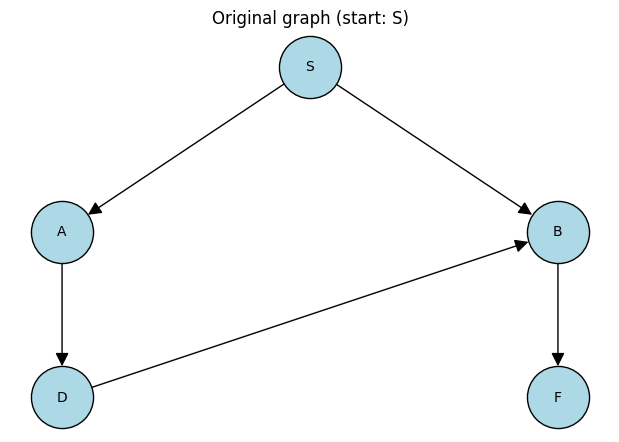

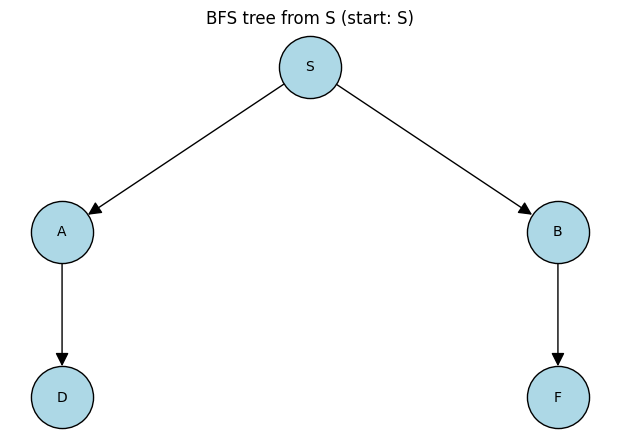

In [8]:
#to run bfs , already provided
distance, parent = bfs(g, "S") # BFS from S

print("Distances from S:") # print distances
for key, value in distance.items():
    print(f"  {key}: {value}")

print("\nParents in BFS tree:")
for key, value in parent.items():
    print(f"  {key}: {value}")

# drawing original graph
draw_graph(g, start="S", title="Original graph")  # full graph

# build BFS tree
bfs_tree = {}
for vertex in parent:
    bfs_tree[vertex] = []  # init list

for vertex, p in parent.items():
    if p is not None:  # skip root
        bfs_tree[p].append(vertex)  # add child

# draw BFS tree
draw_graph(bfs_tree, start="S", title="BFS tree from S")  # bfs tree